The purpose of this notebook is to introduce you to Pandas, it offers data structures and operations for manipulating numerical tables and time series. Pandas is great for playing with sklearn.

In [83]:
import pandas as pd
import numpy as np

Let's investigate how jupyter can help us with python syntax. to get help on particular method use the following methods

In [161]:
help(pd.Series) 

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, *, **) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, dict, or scalar value
 |      Contains data stored in Series
 |  
 |      .. versionchanged :: 0.23.0
 |         If data is a dict, argument order is maintained for Python 3.6
 |         and late

In [162]:
pd.Series?

In [4]:
pd.Series? #this won't work

SyntaxError: invalid syntax (<ipython-input-4-93b5bbf9a293>, line 1)

In [ ]:
??pd.Series

In [85]:
pd.Series()

Series([], dtype: float64)

Jupyter keyboard shortcuts
```
shift + return - execute cell
tab - auto complete
shift + tab - in a function shows parameters of function
alt + return - add cell
```

Display - all shortcuts, press h

# DataSeries

Think of a Series as a one column in a spreadsheet
```
a | value1
b | value2
...
```

**not a**  

```
a   | b | c | ..
val | vl| v2| ..
```

In [163]:
s = pd.Series(np.random.randn(5), index=['a', 'b', 'c', 'd', 'e'], name='example_series')

In [164]:
s

a   -0.761420
b    0.113677
c   -0.772076
d    0.422281
e   -1.244690
Name: example_series, dtype: float64

Get value using index

In [165]:
s['b']

0.11367742439075386

It is also possible to create series with default incremental indices

In [166]:
t = pd.Series(np.random.randn(5), name="without_custom_indices")

In [167]:
t

0   -0.404749
1    0.132815
2   -2.879023
3   -0.543954
4    1.312304
Name: without_custom_indices, dtype: float64

**Going back** to previous example, to see available indices use s.index

In [168]:
s.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [92]:
s.name

'example_series'

In [93]:
s

a    0.458840
b    0.724772
c   -0.682605
d    0.371862
e    1.946977
Name: example_series, dtype: float64

**Get value** under index 0 (a in this case)

In [94]:
s[0]

0.45884026836679065

In [95]:
s[:3] # slice indices list and get values from index: 0, 1, 2

a    0.458840
b    0.724772
c   -0.682605
Name: example_series, dtype: float64

More on **descriptive stats** related functions can be found here:
https://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-stats

In [96]:
s[s > s.median()] # get only values larger than median from all values in series

b    0.724772
e    1.946977
Name: example_series, dtype: float64

Get series with values from implicit indices 4(e), 3(d), 1(b)

In [97]:
s[[4, 3, 1]]

e    1.946977
d    0.371862
b    0.724772
Name: example_series, dtype: float64

**NumPy** is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

Documentation:
https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html

In [98]:
np.exp(s) # Series can be used as input to most of numpy functions

a    1.582238
b    2.064260
c    0.505299
d    1.450432
e    7.007474
Name: example_series, dtype: float64

In [99]:
s + s # we can make vector operations using series

a    0.917681
b    1.449543
c   -1.365210
d    0.743723
e    3.893955
Name: example_series, dtype: float64

**Exercise. 1**

Create two data series A and B with 100 random elements. 

Calculate max value from series A. 

With series B filter out values above average and multiple all the values by 2 and add max value from series A.  

In [100]:
#TBD

In [101]:
A.max()

NameError: name 'A' is not defined

**Dataframe is a 2-dim (or more) labeled data struct with columns of potentially different types. You can think of it like a spreadsheet or SQL table.. or a dict of Series objects.**

In [102]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']), 
     'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


It is possible to select rows from specific indices

In [103]:
pd.DataFrame(d, index=['d', 'b', 'a']) 

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


And select specific columns, note that non-existing column will be filled with NaNs

In [104]:
pd.DataFrame(d, index=['d', 'b', 'a'], columns=['two', 'three'])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [105]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [106]:
df.columns

Index(['one', 'two'], dtype='object')

In [107]:
pd.DataFrame.from_items([('A', [1, 2, 3]), ('B', [4, 5, 6])])

/home/local/ALLEGROGROUP/jakub.pokrywka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


,A,B
0,1,4
1,2,5
2,3,6


In [108]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

It is possible to **multiply two series** and add them as a new column

In [109]:
df['three'] = df['one'] * df['two'] 

In [110]:
df['three']

a    1.0
b    4.0
c    9.0
d    NaN
Name: three, dtype: float64

In [111]:
df

,one,two,three
a,1.0,1.0,1.0
b,2.0,2.0,4.0
c,3.0,3.0,9.0
d,NaN,4.0,NaN


Another example of adding new column to dataframe

In [112]:
df['flag'] = df['one'] > 2 

In [113]:
df

,one,two,three,flag
a,1.0,1.0,1.0,False
b,2.0,2.0,4.0,False
c,3.0,3.0,9.0,True
d,NaN,4.0,NaN,False


In [114]:
del df['two'] # columns | series can be deleted

In [115]:
df

,one,three,flag
a,1.0,1.0,False
b,2.0,4.0,False
c,3.0,9.0,True
d,NaN,NaN,False


In [116]:
three = df.pop('three') # or popped like from dict

In [117]:
df

,one,flag
a,1.0,False
b,2.0,False
c,3.0,True
d,NaN,False


**If you put scalar value** it will fill entire column (all indices)

In [118]:
df['foo'] = 'bar' 

In [119]:
df

,one,flag,foo
a,1.0,False,bar
b,2.0,False,bar
c,3.0,True,bar
d,NaN,False,bar


df.insert allows you to place column at given position

In [120]:
df.insert(1, 'bar', df['one'])
df.insert(3, 'end', df['one'])

In [121]:
df

,one,bar,flag,end,foo
a,1.0,1.0,False,1.0,bar
b,2.0,2.0,False,2.0,bar
c,3.0,3.0,True,3.0,bar
d,NaN,NaN,False,NaN,bar


In [122]:
df['last_column'] = df['one'][:2]
df

,one,bar,flag,end,foo,last_column
a,1.0,1.0,False,1.0,bar,1.0
b,2.0,2.0,False,2.0,bar,2.0
c,3.0,3.0,True,3.0,bar,NaN
d,NaN,NaN,False,NaN,bar,NaN


In [123]:
# copy_of_df = df.assign( one_and_end = df['one'] + df['end'])
copy_of_df = df.assign( one_and_end = lambda x: (x['one'] + x['end']))
copy_of_df

,one,bar,flag,end,foo,last_column,one_and_end
a,1.0,1.0,False,1.0,bar,1.0,2.0
b,2.0,2.0,False,2.0,bar,2.0,4.0
c,3.0,3.0,True,3.0,bar,NaN,6.0
d,NaN,NaN,False,NaN,bar,NaN,NaN


In [124]:
df.filter(items=['one', 'end'])

,one,end
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,NaN


In [125]:
df['one'].map(lambda x: x + 1)

a    2.0
b    3.0
c    4.0
d    NaN
Name: one, dtype: float64

In [126]:
copy_of_df

,one,bar,flag,end,foo,last_column,one_and_end
a,1.0,1.0,False,1.0,bar,1.0,2.0
b,2.0,2.0,False,2.0,bar,2.0,4.0
c,3.0,3.0,True,3.0,bar,NaN,6.0
d,NaN,NaN,False,NaN,bar,NaN,NaN


Pandas has basic ploting capabilities
https://pandas.pydata.org/pandas-docs/stable/visualization.html

%matplotlib inline -- is necessary to plot charts in the notebook

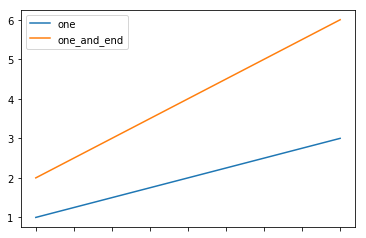

In [127]:
%matplotlib inline
to_plot = pd.DataFrame(copy_of_df, index=['a','b','c'], columns=['one', 'one_and_end'])
to_plot.plot()

**It also has support for more SQL-like syntax**

In [128]:
to_plot.query('one > 1.0') 

,one,one_and_end
b,2.0,4.0
c,3.0,6.0


In [129]:
to_plot[to_plot['one'] > 1.0]

,one,one_and_end
b,2.0,4.0
c,3.0,6.0


Get entire row in a "table"

In [130]:
df.loc['a']

one                1
bar                1
flag           False
end                1
foo              bar
last_column        1
Name: a, dtype: object

Get all values stored under index = 0

In [131]:
df.iloc[0] 

one                1
bar                1
flag           False
end                1
foo              bar
last_column        1
Name: a, dtype: object

In [132]:
to_plot

,one,one_and_end
a,1.0,2.0
b,2.0,4.0
c,3.0,6.0


In [133]:
to_plot * 5 + 2 # vector operations

,one,one_and_end
a,7.0,12.0
b,12.0,22.0
c,17.0,32.0


In [134]:
df1 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] }, dtype=bool)
df2 = pd.DataFrame({'a' : [0, 1, 1], 'b' : [1, 1, 0] }, dtype=bool)

In [135]:
df1

,a,b
0,True,False
1,False,True
2,True,True


In [136]:
df2

,a,b
0,False,True
1,True,True
2,True,False


Logical operations on whole dataframes

In [137]:
df1 & df2 

,a,b
0,False,False
1,False,True
2,True,False


In [138]:
df

,one,bar,flag,end,foo,last_column
a,1.0,1.0,False,1.0,bar,1.0
b,2.0,2.0,False,2.0,bar,2.0
c,3.0,3.0,True,3.0,bar,NaN
d,NaN,NaN,False,NaN,bar,NaN


**Exercise 3**

Extend df by column with bool values [True, False, True, False]


In [139]:
# TBD

In [140]:
# you can store text values in column
df['text'] = pd.Series(["yes", "no", "yes", "maybe"], index=['a','b','c','d'])

In [141]:
df

,one,bar,flag,end,foo,last_column,text
a,1.0,1.0,False,1.0,bar,1.0,yes
b,2.0,2.0,False,2.0,bar,2.0,no
c,3.0,3.0,True,3.0,bar,NaN,yes
d,NaN,NaN,False,NaN,bar,NaN,maybe


**Text columns** can be used to filter out rows

In [142]:
df[df['text'].str.startswith('y')]

,one,bar,flag,end,foo,last_column,text
a,1.0,1.0,False,1.0,bar,1.0,yes
c,3.0,3.0,True,3.0,bar,NaN,yes


There is a support for negation. This one matches to everything which does not start with 'y'

In [143]:
df[~df['text'].str.startswith('y')]

,one,bar,flag,end,foo,last_column,text
b,2.0,2.0,False,2.0,bar,2.0,no
d,NaN,NaN,False,NaN,bar,NaN,maybe


Dataframes can be joined like SQL table.

**"Merge and Join DataFrames with Pandas in Python"**

https://www.shanelynn.ie/merge-join-dataframes-python-pandas-index-1/

Documentation: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.merge.html#pandas.merge

In [144]:
df1 = pd.DataFrame({'a' : [123, 124, 125], 'b' : [0, 1, 1] }, dtype=int)
df2 = pd.DataFrame({'a' : [123, 124, 125], 'c' : [2, 3, 4] }, dtype=int)

df1

,a,b
0,123,0
1,124,1
2,125,1


In [145]:
df2

,a,c
0,123,2
1,124,3
2,125,4


In [146]:
merged = df1.merge(df2, on='a')

In [147]:
merged

,a,b,c
0,123,0,2
1,124,1,3
2,125,1,4


Interaction with csv's:

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [148]:
# save results to csv
merged.to_csv('merged.csv')

In [149]:
merged

,a,b,c
0,123,0,2
1,124,1,3
2,125,1,4


You can set various options for pandas itself eg. manipulate with dataframes display options - you might need this for clarity

In [150]:
pd.set_option('display.width', 40) # default is 80

**A bit more complicated example** with reading data 

To invoke shell commands use !

In [151]:
! cat no_headers.csv

wartosc tekstowa; 12; 12.2; 113
wartosc tekstowa 2; 14; 14; 11
wartosc tekstowa 2; 15; 13; 12

You can load csv with built-in type inference

In [152]:
headers = ['label', 'int_value_1', 'float_value_2', 'int_value_2']
df = pd.read_csv('no_headers_nans.csv', 
                 sep = ';', 
                 names = headers, 
                 header = None)
df.head()
# results may contain NaNs if there are empty values

,label,int_value_1,float_value_2,int_value_2
0,wartosc tekstowa,12.0,12.2,113
1,wartosc tekstowa 2,14.0,14.0,11
2,wartosc tekstowa 2,15.0,13.0,12
3,wartosc tekstowa 3,NaN,2.3,11


In [153]:
# to load only selected columns one can use usecols
headers = ['label', 'int_value_1', 'float_value_2', 'int_value_2']
df = pd.read_csv('no_headers_nans.csv', 
                 sep = ';', 
                 names = headers, 
                 header = None, 
                 usecols = [0,1])
df.head()
# results may contain NaNs if there are empty values

,label,int_value_1
0,wartosc tekstowa,12.0
1,wartosc tekstowa 2,14.0
2,wartosc tekstowa 2,15.0
3,wartosc tekstowa 3,NaN


if **built-in type inherence won't work** as you expect you can specify types on your own but in case of NaNs in data it may end-up with error

In [154]:
headers = ['label', 'int_value_1', 'float_value_2', 'int_value_2']

dtypes = {'label': 'str', 
          'int_value_1' : 'int', 
          'float_value_2' : 'float', 
          'int_value_2' : 'int' }

df = pd.read_csv('no_headers.csv', 
                 sep = ';', 
                 names = headers, 
                 header = None, 
                 encoding = 'utf-8',
                 dtype = dtypes,
                 verbose = True)
df.head()

Tokenization took: 0.01 ms
Type conversion took: 0.20 ms
Parser memory cleanup took: 0.01 ms


,label,int_value_1,float_value_2,int_value_2
0,wartosc tekstowa,12,12.2,113
1,wartosc tekstowa 2,14,14.0,11
2,wartosc tekstowa 2,15,13.0,12


**Exercise 4**

Try to load file no_headers_nans.csv with explicit typing as show above

In [155]:
headers = ['label', 'int_value_1', 'float_value_2', 'int_value_2']

# converters override types definition, 
# so there it is not necessary to specify 
# type for int_value_2
dtypes = {'label': 'str', 
          'float_value_2' : 'float', 
          'int_value_2' : 'int' }

def nanSafeConv(val):
    if val == "":
        return -1
    return val

df = pd.read_csv('no_headers_nans.csv', 
                 sep = ';', 
                 names = headers, 
                 converters = {'int_value_1' : nanSafeConv},
                 header = None, 
                 encoding = 'utf-8',
                 dtype = dtypes)
df

,label,int_value_1,float_value_2,int_value_2
0,wartosc tekstowa,12,12.2,113
1,wartosc tekstowa 2,14,14.0,11
2,wartosc tekstowa 2,15,13.0,12
3,wartosc tekstowa 3,-1,2.3,11


In [156]:
df['label'].value_counts()

wartosc tekstowa 2    2
wartosc tekstowa 3    1
wartosc tekstowa      1
Name: label, dtype: int64

In [157]:
df = df.drop_duplicates(subset='label', keep='first')

In [158]:
df

,label,int_value_1,float_value_2,int_value_2
0,wartosc tekstowa,12,12.2,113
1,wartosc tekstowa 2,14,14.0,11
3,wartosc tekstowa 3,-1,2.3,11


In [159]:
def convert_data(label_value):
    try:
        return len(label_value)
    except TypeError:
        print("Found error in {}".format(encoded_title))
        return -1

copy_df = df.copy()
copy_df['label_lenght'] = df['label'].map(convert_data)
copy_df

,label,int_value_1,float_value_2,int_value_2,label_lenght
0,wartosc tekstowa,12,12.2,113,16
1,wartosc tekstowa 2,14,14.0,11,18
3,wartosc tekstowa 3,-1,2.3,11,18


**Exercise 5**

Preprocess data from two files: predicted_category.tsv and actual_category.tsv 

to the following format: title, predicted_category, actual_category

Both files may contain duplicates, final output should be duplicate-free.

To decode title values use Pythons: 
```
        import urllib.parse
        decoded_title = urllib.parse.unquote(encoded_title)
        return decoded_title.strip()
```

In [160]:
!cat predicted_category.tsv
!cat actual_category.tsv

SWORZE%C5%83%20WAHACZA%20FIAT%20DUCATO%202006-%20PEUGEOT%20BOXER%0A	250883	250885	250884
8FILEDS%20-%20Podw%C3%B3jna%20%C5%82adownica%205%2C56mm%20z%20miejscem%20na%0A	9200	12177	253895
HUAWEI%20MATE%209%20PRO%20%7C%20ETUI%20OBUDOWA%20%20%2B%20RYSIK%20%2B%20SZK%C5%81O%0A	19348	19336	19322
Dach%C3%B3wka%20ceramiczna%20antracytowa%2039%2C96%20z%C5%82/m2%20p%C5%82aska%0A	46119
LAWRENCE%20DURRELL%20-%20MOUNTOLIVE%20/ALEXANDRIA%20QUARTET/%0A	91485
..Star%20Carrier.%20Tom%201.%20Pierwsze%20uderzenie%0A	92473	79168	92465
SPEED%20RACER%20%5E%5E%20emile%20hirsch%0A	100115	100080
2x%20Goodride%20RP28%20215/65%20R15%2096%20H%0A	257689	257694	257698
Zestaw%202%20aluminiowych%20le%C5%BCak%C3%B3w%20ogrodowych%2C%20kolor%20cz%0A	527	82259
Pi%C5%BCamka%20Kombinezon%20Kigurumi%20Onesie%20Szkielet%209%20lat%0A	89516	89482

SWORZE%C5%83%20WAHACZA%20FIAT%20DUCATO%202006-%20PEUGEOT%20BOXER%0A	250883
SWORZE%C5%83%20WAHACZA%20FIAT%20DUCATO%202006-%20PEUGEOT%20BOXER%0A	250884
8FILEDS%20-%20Podw%C3%B3jna%20%C5